In [1]:
import sys
sys.path = ['', '/home/submit/lavezzo/zstuff/WRemnants', '/home/submit/lavezzo/zstuff/WRemnants/narf', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/opt/venv/lib/python3.10/site-packages']
import argparse
import os
import lz4.frame
import pickle
import hist
from utilities import boostHistHelpers as hh, logging
#import wremnants
import hdf5plugin

import h5py
import narf
from narf import ioutils
import ROOT
from utilities import input_tools as it
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
plt.rcParams['figure.dpi'] = 50

Welcome to JupyROOT 6.28/02


Parameters

In [2]:
INPUT_FILE = '/data/submit/cms/store/user/lavezzo/ZBosonAnalysis/TheoryAgnostic/01_09_2023__19_05_05/mz_dilepton.hdf5'
LUMI = 'xx'

Looking at the contents of the hdf5 file

In [3]:
h5file = h5py.File(INPUT_FILE, "r")
results = narf.ioutils.pickle_load_h5py(h5file["results"])

In [4]:
processes = list(results.keys())
print(processes)

['dataPostVFP', 'ZmumuPostVFP', 'ZtautauPostVFP', 'QCDmuEnrichPt15PostVFP', 'Diboson', 'Top', 'Wtaunu', 'Wmunu', 'BkgZmumu', 'meta_info']


In [5]:
proc = "ZmumuPostVFP"

hists = list(results[proc]['output'].keys())
print(hists)

['xnorm', 'xnorm_massWeightZ', 'weight', 'nominal', 'nominal_ptll', 'nominal_ptll_pdfMSHT20', 'nominal_ptll_pdfMSHT20alphaS002', 'nominal_ptll_qcdScale', 'nominal_ptll_uncorr', 'nominal_ptll_scetlib_dyturboCorr', 'nominal_ptll_qcdScaleByHelicity', 'nominal_ptll_massWeightZ', 'nominal_mll', 'nominal_mll_pdfMSHT20', 'nominal_mll_pdfMSHT20alphaS002', 'nominal_mll_qcdScale', 'nominal_mll_uncorr', 'nominal_mll_scetlib_dyturboCorr', 'nominal_mll_qcdScaleByHelicity', 'nominal_mll_massWeightZ', 'nominal_yll', 'nominal_yll_pdfMSHT20', 'nominal_yll_pdfMSHT20alphaS002', 'nominal_yll_qcdScale', 'nominal_yll_uncorr', 'nominal_yll_scetlib_dyturboCorr', 'nominal_yll_qcdScaleByHelicity', 'nominal_yll_massWeightZ', 'nominal_etaPlus', 'nominal_etaPlus_pdfMSHT20', 'nominal_etaPlus_pdfMSHT20alphaS002', 'nominal_etaPlus_qcdScale', 'nominal_etaPlus_uncorr', 'nominal_etaPlus_scetlib_dyturboCorr', 'nominal_etaPlus_qcdScaleByHelicity', 'nominal_etaPlus_massWeightZ', 'nominal_etaMinus', 'nominal_etaMinus_pdfMSH

In [6]:
def findHists(hists, match):
    return [k for k in hists if match.lower() in k.lower()]

findHists(hists, 'hel')

['nominal_ptll_qcdScaleByHelicity',
 'nominal_mll_qcdScaleByHelicity',
 'nominal_yll_qcdScaleByHelicity',
 'nominal_etaPlus_qcdScaleByHelicity',
 'nominal_etaMinus_qcdScaleByHelicity',
 'nominal_ptPlus_qcdScaleByHelicity',
 'nominal_ptMinus_qcdScaleByHelicity',
 'nominal_cosThetaStarll_qcdScaleByHelicity',
 'nominal_phiStarll_qcdScaleByHelicity']

In [7]:
results['ZmumuPostVFP']['output']['nominal'].get()

Hist(
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptll'),
  Regular(20, -2.5, 2.5, name='yll'),
  Regular(20, -1, 1, underflow=False, overflow=False, name='cosThetaStarll'),
  Regular(20, -3.14159, 3.14159, circular=True, name='phiStarll'),
  Variable([0, 0.5, 1, 1.5, 2, 2.5], underflow=False, overflow=False, name='absYVgenSig'),
  Variable(array([  0. ,   2.5,   5. ,   8. ,  11.4,  14.9,  18.5,  22. ,  25.5,
        29. ,  32.6,  36.4,  40.4,  44.9,  50.2,  56.4,  63.9,  73.4,
        85.4, 105. , 132. , 173. , 253. , 600. ]), underflow=False, name='ptVgenSig'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity'),
  storage=Weight()) # Sum: WeightedSum(value=63.0084, variance=3.52156)

Print 1D hists

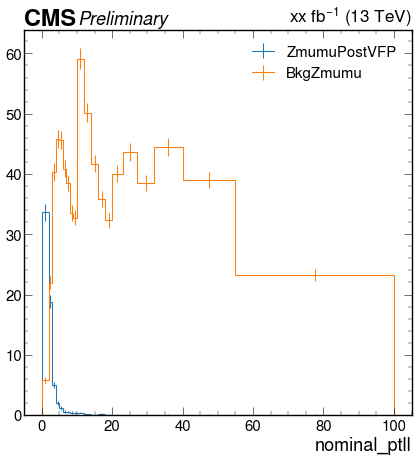

In [8]:
procs = ['ZmumuPostVFP', 'BkgZmumu']
hname = "nominal_ptll"

hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)

for proc in procs:
    h = results[proc]['output'][hname].get()
    hep.histplot(h, yerr=True, label=proc)

_=plt.xlabel(hname)
_=plt.legend()
#plt.yscale('log')

Print 2D hists

Available axes:
ptll
yll
cosThetaStarll
phiStarll
absYVgenSig
ptVgenSig
helicity


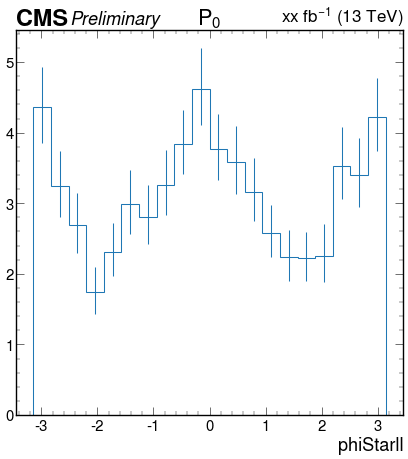

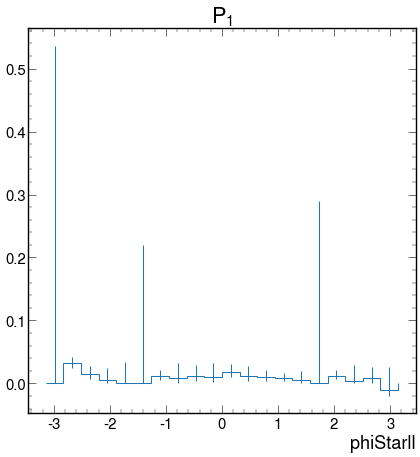

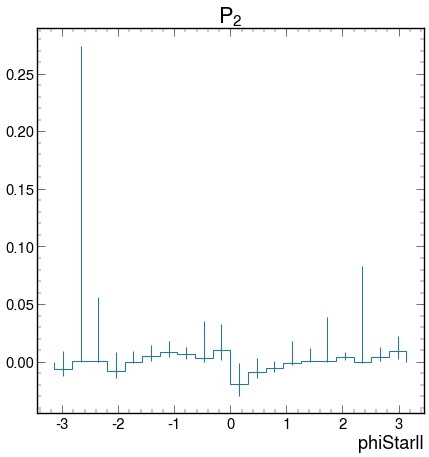

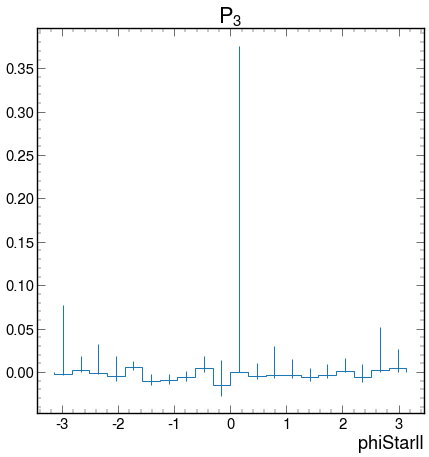

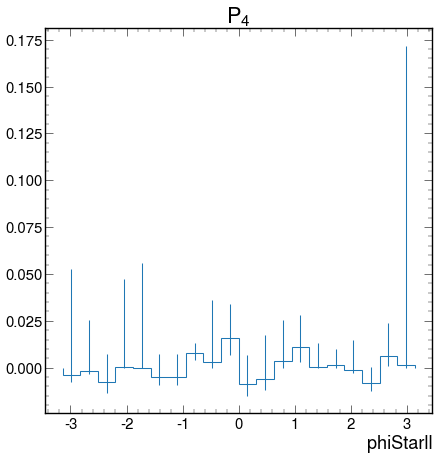

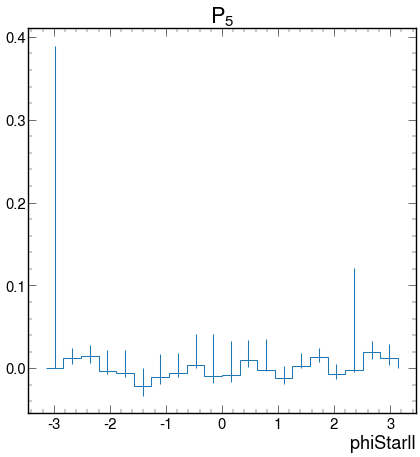

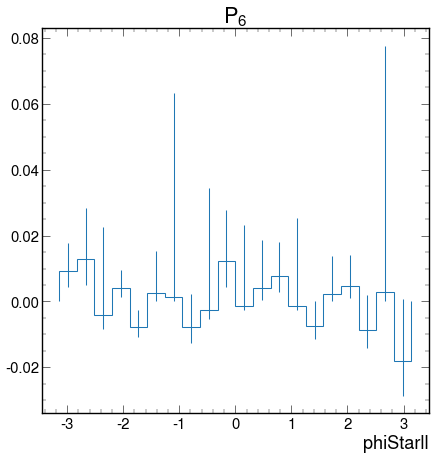

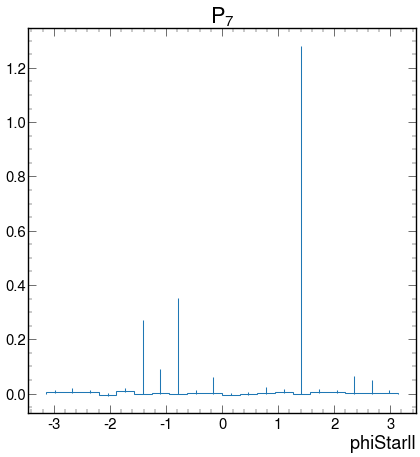

In [9]:
h = results['ZmumuPostVFP']['output']['nominal'].get()

print("Available axes:")
for ax in h.axes:
    print(ax.name)
    
hep.cms.label(llabel='Preliminary',data=False, lumi=LUMI)
for hel in range(8):
    _ = hep.histplot(h[::sum,::sum,::sum,:,::sum, 0j:11j:sum, hel])
    plt.title("$P_{}$".format(hel))
    plt.show()

In [10]:
import wremnants
from wremnants import theory_tools, theory_corrections, plot_tools
from utilities import input_tools, boostHistHelpers as hh,common

out = results['ZmumuPostVFP']['output']['nominal'].get()
coeffs_moments = out.project('ptll', 'helicity')

with h5py.File('../wremnants-data/data/angularCoefficients/w_z_coeffs_scetlib_dyturboCorr.hdf5', "r") as ff:
    out = narf.ioutils.pickle_load_h5py(ff["results"])
corrh = out['Z'] 
corrh = corrh.project('ptVgen', 'helicity')
corrh_noerrs = hist.Hist(*corrh.axes, storage=hist.storage.Double())
corrh_noerrs.values(flow=True)[...] = corrh.values(flow=True)

In [27]:
out['Z']

Hist(
  Variable([60, 70, 80, 90, 100, 110, 120], name='massVgen'),
  Regular(200, -5, 5, name='y'),
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact'),
  storage=Double()) # Sum: 214879.160262227 (306828.7403610701 with flow)

In [13]:
def rebin_piecewise(h_in, bins, histtype="hist"):
    """
    Inputs:
        h : histogram
        bins: list of bins as real numbers
        histtype: one of allowed_histtypes to return

    Returns:
        h_out: a histogram of type 'histtype', rebinned according to desired bins
    """

    # only 1D hists supported for now
    if len(h_in.shape) != 1:
        raise Exception("Only 1D hists supported for now")

    # only hist and bh supported
    allowed_histtypes = ["hist", "bh"]
    if histtype not in allowed_histtypes:
        raise Exception("histtype in not in allowed_histtypes")

    # check that the bins are real numbers
    if any([x.imag != 0 for x in bins]):
        raise Exception("Only pass real-valued bins")

    # split the histogram by the bins
    # and for each bin, calculate total amount of events and variance
    z_vals, z_vars = [], []
    for iBin in range(len(bins) - 1):
        if histtype == "hist":
            bin_lo = bins[iBin] * 1.0j
            bin_hi = bins[iBin + 1] * 1.0j
        elif histtype == "bh":
            bin_lo = bh.loc(bins[iBin])
            bin_hi = bh.loc(bins[iBin + 1])

        h_fragment = h_in[bin_lo:bin_hi]
        z_vals.append(h_fragment.sum())
        z_vars.append(h_fragment.sum())

    # fill the histograms
    if histtype == "hist":
        h_out = hist.Hist(
            hist.axis.Variable(bins, label=h_in.axes[0].label, name=h_in.axes[0].name),
            storage=hist.storage.Weight(),
            label=h_in.axes[0].label,
        )
        h_out[:] = np.stack([z_vals, z_vars], axis=-1)

    elif histtype == "bh":
        h_out = bh.Histogram(bh.axis.Variable(bins), storage=bh.storage.Weight())
        h_out[:] = np.stack([z_vals, z_vars], axis=-1)

    return h_out

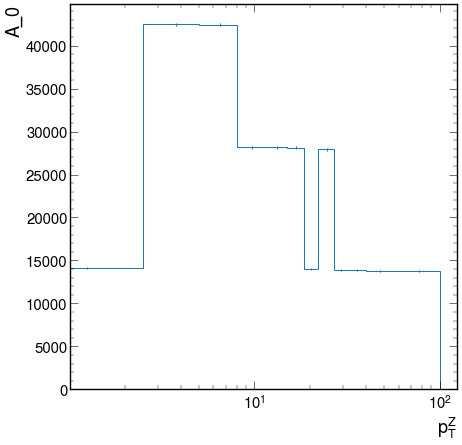

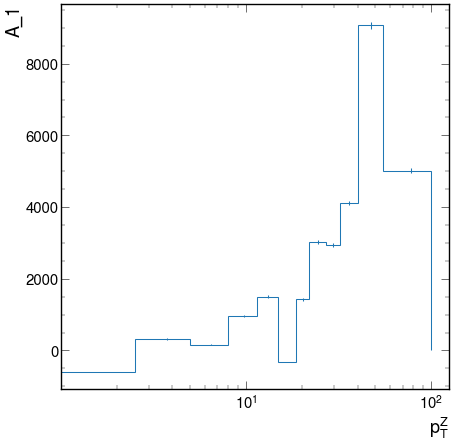

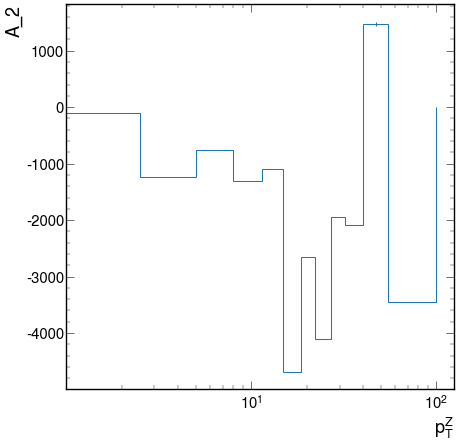

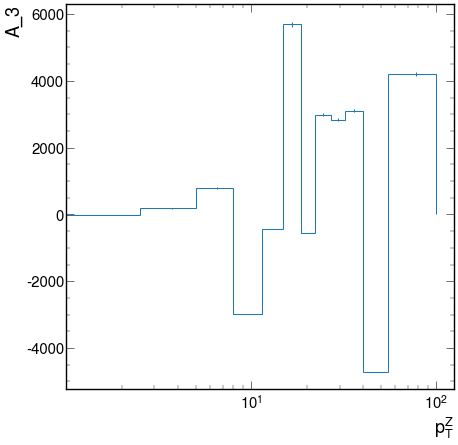

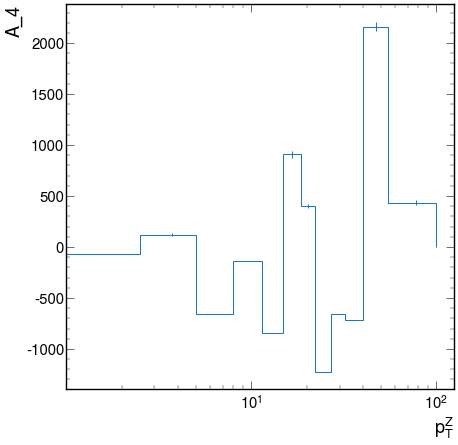

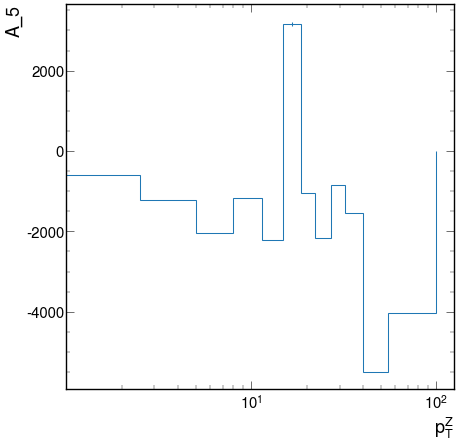

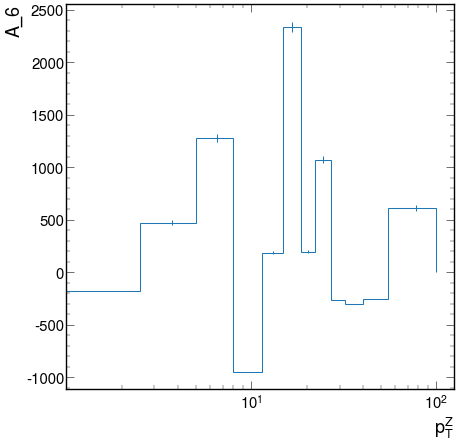

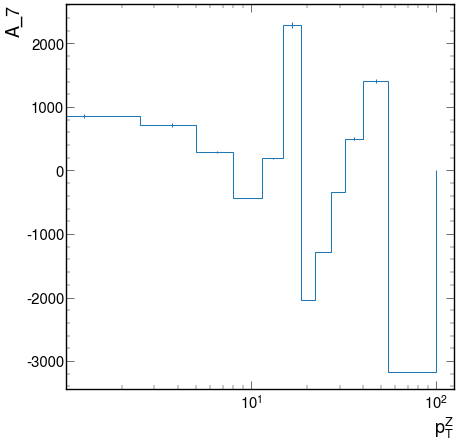

In [16]:
for coeff in range(8):
    hcoeff = corrh[:,coeff]
    hcoeff = rebin_piecewise(hcoeff, [0., 2.5, 5.0, 8.0, 11.4, 14.9, 18.5, 22.0, 27, 32, 40, 55, 100.0])
    hep.histplot(hcoeff)
    plt.xlabel("$p_{T}^Z$")
    plt.ylabel(f"A_{coeff}")
    plt.xscale('log')
    plt.savefig(f"/home/submit/lavezzo/public_html/zstuff/coeffs/coeff_{coeff}.pdf")
    plt.savefig(f"/home/submit/lavezzo/public_html/zstuff/coeffs/coeff_{coeff}.png")
    plt.show()
    plt.close()